In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# import

from google.colab import files
from PIL import Image
import numpy as np
from numpy import asarray 
import pandas as pd
import torchvision
from torchvision import transforms

In [ ]:
# upload files from computer

images_array = []
labels_array = []

data = {'images': images_array, 'labels': labels_array}

# how many images from each folder to take
num = 300
image_size = 200

In [ ]:
def process_image(image):
  """
  Takes in image. Returns padded numpy array. 
  """
  PIL_image = image[0] # get PIL Image only
  PIL_image.thumbnail((image_size, image_size)) # resize PIL image
  np_array = np.array(PIL_image) # convert to numpy array
  result = np.zeros((image_size, image_size, 3))
  result[:np_array.shape[0],:np_array.shape[1]] = np_array
  # result currently holds the padded image
  return result


In [ ]:
# none
none_path = '/content/gdrive/My Drive/riskmap_urop/all_none'
all_none = torchvision.datasets.ImageFolder(root = none_path)
# images come in as tuple of (PIL Image, 0)
#for image in all_none:
for i in range(num):
  image = all_none[i]
  result = process_image(image)
  images_array.append(result.flatten())
  labels_array.append('none')

In [ ]:
# mild
mild_path = '/content/gdrive/My Drive/riskmap_urop/all_mild'
all_mild = torchvision.datasets.ImageFolder(root = mild_path)
#for image in all_mild:
for i in range(num):
  image = all_mild[i]
  result = process_image(image)
  images_array.append(result.flatten())
  labels_array.append('mild')

In [ ]:
# severe
severe_path = '/content/gdrive/My Drive/riskmap_urop/all_severe'
all_severe = torchvision.datasets.ImageFolder(root = severe_path)
#for image in all_severe:
for i in range(num):
  image = all_severe[i]
  result = process_image(image)
  images_array.append(result.flatten())
  labels_array.append('severe')

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.columns = range(df.shape[1])

In [ ]:
print(df.head())

                                                   0     1
0  [14.0, 26.0, 64.0, 14.0, 26.0, 64.0, 14.0, 26....  none
1  [38.0, 42.0, 53.0, 32.0, 36.0, 47.0, 29.0, 33....  none
2  [19.0, 2.0, 127.0, 19.0, 2.0, 127.0, 19.0, 2.0...  none
3  [255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255...  none
4  [77.0, 117.0, 189.0, 77.0, 117.0, 189.0, 77.0,...  none


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# run this line again to get a different training set and different results
X_train, X_test, y_train, y_test = train_test_split(df.drop([1], axis = 'columns'), df[1], test_size = 0.2)

In [ ]:
# now use random forest
# ensemble is used when using multiple algorithms to predict an outcome
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# # run this line again to get a different training set and different results
# X_train, X_test, y_train, y_test = train_test_split(df.drop([1], axis = 'columns'), df[1], test_size = 0.2)

# # more trees, score increases
# # fin tune n_estimators (trees)

# import random

# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 1, stop = 80, num = 50)]
# # Number of features to consider at every split
# max_features = ['auto']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 80, num = 30)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 3, 4, 5, 6, 7, 8, 9]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [2, 3, 4, 5, 6, 7, 8, 9]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid

# rf_score = 0

# while rf_score < 0.65:
#   X_train, X_test, y_train, y_test = train_test_split(df.drop([1], axis = 'columns'), df[1], test_size = 0.2)
#   random_grid = {'n_estimators': random.choice(n_estimators),
#                 'max_features': random.choice(max_features),
#                 'max_depth': random.choice(max_depth),
#                 'min_samples_split':random.choice( min_samples_split),
#                 'min_samples_leaf': random.choice(min_samples_leaf),
#                 'bootstrap': random.choice(bootstrap)}
#   model = RandomForestClassifier(n_estimators = random_grid['n_estimators'], 
#                                 max_features = random_grid['max_features'], 
#                                 max_depth = random_grid['max_depth'], 
#                                 min_samples_split = random_grid['min_samples_split'], 
#                                 min_samples_leaf = random_grid['min_samples_leaf'], 
#                                 bootstrap = random_grid['bootstrap'])
#   model.fit(list(X_train[0]), y_train)
#   rf_score = model.score(list(X_test[0]), y_test)

# print('Random Grid:', random_grid)
# print('Score:', rf_score)

Random Grid: {'n_estimators': 59, 'max_features': 'auto', 'max_depth': 80, 'min_samples_split': 8, 'min_samples_leaf': 9, 'bootstrap': False}
Score: 0.6666666666666666


In [ ]:
model = RandomForestClassifier(n_estimators = 30, 
                               max_features = 'auto', 
                               max_depth = 20, 
                               min_samples_split = 4, 
                               min_samples_leaf = 3, 
                               bootstrap = False)

In [ ]:
model.fit(list(X_train[0]), y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
model.score(list(X_test[0]), y_test)

0.6444444444444445

In [ ]:
# plot confusion matrix to see where perform well/poorly
y_predicted = model.predict(list(X_test[0]))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
print(cm)

[[35  5 15]
 [17 43  6]
 [15  6 38]]


Text(69.0, 0.5, 'Truth')

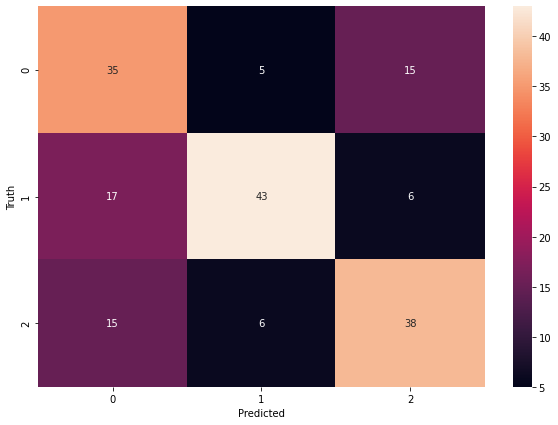

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sn 
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True)
# change label 0 1 2
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# try to find confidence level for each category for each image

In [ ]:
from keras.preprocessing.image import img_to_array, load_img
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

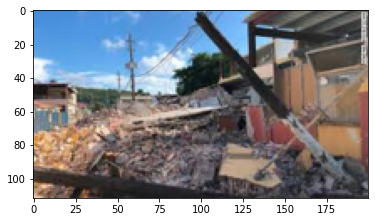

Classification: ['mild']
None: 0.4011111111111111
Mild: 0.19888888888888887
Severe: 0.4


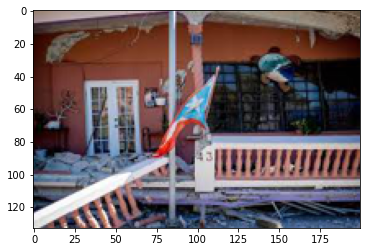

Classification: ['mild']
None: 0.42
Mild: 0.2627777777777778
Severe: 0.3172222222222222


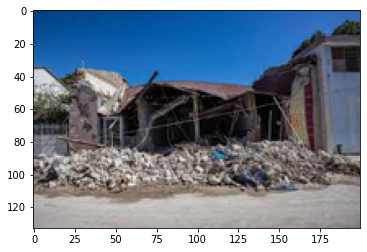

Classification: ['severe']
None: 0.24666666666666665
Mild: 0.28888888888888886
Severe: 0.46444444444444444


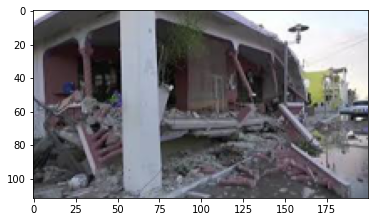

Classification: ['severe']
None: 0.3088888888888889
Mild: 0.2116666666666667
Severe: 0.4794444444444445


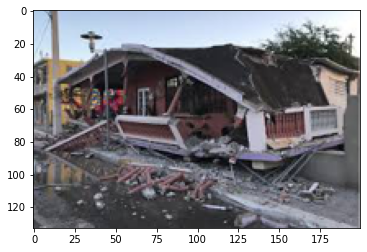

Classification: ['mild']
None: 0.44999999999999996
Mild: 0.1722222222222222
Severe: 0.3777777777777778


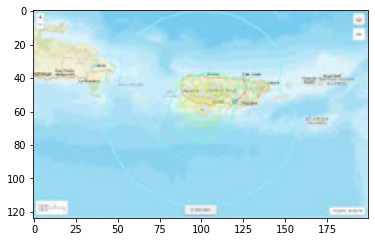

Classification: ['mild']
None: 0.4633333333333333
Mild: 0.44888888888888884
Severe: 0.08777777777777777


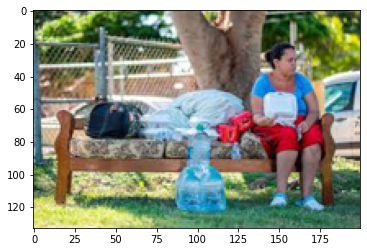

Classification: ['severe']
None: 0.2861111111111111
Mild: 0.33055555555555555
Severe: 0.3833333333333334


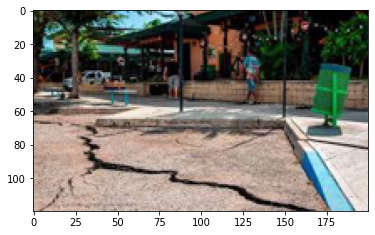

Classification: ['mild']
None: 0.4772222222222222
Mild: 0.3688888888888889
Severe: 0.1538888888888889


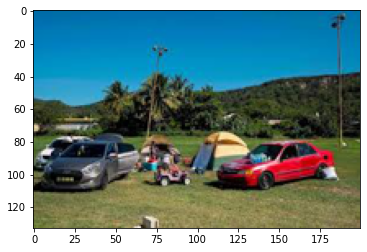

Classification: ['severe']
None: 0.2427777777777778
Mild: 0.19
Severe: 0.5672222222222222


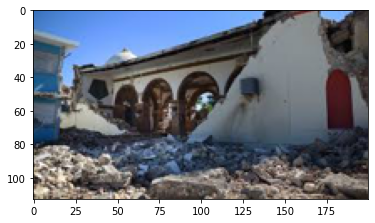

Classification: ['severe']
None: 0.3194444444444445
Mild: 0.15277777777777776
Severe: 0.5277777777777778


In [ ]:
from matplotlib.pyplot import imshow
%matplotlib inline

def process_image1(image):
  """
  Takes in image. Returns padded numpy array. 
  """
  PIL_image = image[0] # get PIL Image only
  PIL_image.thumbnail((200,200)) # resize PIL image
  np_array = np.array(PIL_image) # convert to numpy array
  return np_array

def process_image2(np_array):
  """
  Takes in image. Returns padded numpy array. 
  """
  result = np.zeros((200, 200, 3))
  result[:np_array.shape[0],:np_array.shape[1]] = np_array
  # result currently holds the padded image
  return result

images = []

pr_path = '/content/gdrive/My Drive/riskmap_urop_data/puerto_rico'
all_pr = torchvision.datasets.ImageFolder(root = pr_path)

for i in range(len(all_pr)):
  image = all_pr[i]
  PIL_image = process_image1(image)
  imgplot = plt.imshow(PIL_image)
  plt.show()
  result = process_image2(PIL_image).flatten()
  proba = model.predict_proba([result])
  print("Classification:", model.predict([result]))
  print("None:", proba[0][0])
  print("Mild:", proba[0][1])
  print("Severe:", proba[0][2])